In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Importing Data

In [2]:
customers=pd.read_csv('Input1_clientes_estructura.csv',sep=';')
sales=pd.read_csv('Input2_clientes_venta.csv',sep=';')
test=pd.read_csv('Input3_clientes_test.csv',sep=';')
products_to_score=pd.read_excel('Product_To_Score.xlsx',sheets='Sheet1') # Products to be include in test

In [3]:
customers.shape

(20921, 6)

In [4]:
customers.describe(include='all')

,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
count,20921.000000,20921,20921,20921,20921,20921.000000
unique,NaN,1,11,32,6,NaN
top,NaN,Regional 1,Gerencia_10,Subcanal_3,Categoria_2,NaN
freq,NaN,20921,5441,8217,8773,NaN
mean,10461.000000,NaN,NaN,NaN,NaN,0.397830
std,6039.516827,NaN,NaN,NaN,NaN,0.489462
min,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,5231.000000,NaN,NaN,NaN,NaN,0.000000
50%,10461.000000,NaN,NaN,NaN,NaN,0.000000
75%,15691.000000,NaN,NaN,NaN,NaN,1.000000


In [5]:
customers['Cliente']=customers['Cliente'].astype(str)+"C"

In [6]:
sales.shape

(1406116, 10)

In [7]:
sales.describe(include='all')

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr
count,1.406116e+06,1.406116e+06,1.406116e+06,1406116,1406116,1406116,1406116,1.406116e+06,1.406116e+06,1.406116e+06
unique,NaN,NaN,NaN,3,39,5,17,NaN,NaN,NaN
top,NaN,NaN,NaN,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_10,NaN,NaN,NaN
freq,NaN,NaN,NaN,991679,406526,786172,707919,NaN,NaN,NaN
mean,2.019518e+03,6.865562e+00,8.328064e+03,NaN,NaN,NaN,NaN,2.294363e-01,-1.335855e+02,1.704834e+03
std,4.996729e-01,2.996953e+00,4.906400e+03,NaN,NaN,NaN,NaN,1.395798e+00,1.491833e+03,1.047079e+04
min,2.019000e+03,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,-4.794567e+05,0.000000e+00
25%,2.019000e+03,5.000000e+00,4.148000e+03,NaN,NaN,NaN,NaN,2.173441e-02,-2.877037e+01,1.778085e+02
50%,2.020000e+03,7.000000e+00,8.097000e+03,NaN,NaN,NaN,NaN,5.268947e-02,0.000000e+00,4.233184e+02
75%,2.020000e+03,9.000000e+00,1.231800e+04,NaN,NaN,NaN,NaN,1.496381e-01,0.000000e+00,1.117963e+03


In [8]:
sales['Cliente']=sales['Cliente'].astype(str)+"C"

In [9]:
sales['NR/Vol']=sales['nr']/sales['Volumen']
sales['NR/Vol']=sales['NR/Vol'].fillna(0)

In [10]:
test.shape

(9302, 6)

In [11]:
test.describe(include='all')

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
count,9302.000000,0.0,0.0,0.0,0.0,0.0
mean,9837.522038,NaN,NaN,NaN,NaN,NaN
std,5623.122776,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,4886.000000,NaN,NaN,NaN,NaN,NaN
50%,9668.500000,NaN,NaN,NaN,NaN,NaN
75%,14566.750000,NaN,NaN,NaN,NaN,NaN
max,20569.000000,NaN,NaN,NaN,NaN,NaN


In [12]:
test['Cliente']=test['Cliente'].astype(str)+"C"

In [13]:
products_to_score.head()

,ID,Marca2,Cupo2,CapacidadEnvase
0,1,Marca_20,Cupo_3,CapacidadEnvase_9
1,2,Marca_16,Cupo_2,CapacidadEnvase_10
2,3,Marca_9,Cupo_2,CapacidadEnvase_12
3,4,Marca_38,Cupo_2,CapacidadEnvase_10
4,5,Marca_39,Cupo_2,CapacidadEnvase_10


# 2) Master Data

## Products

In [14]:
products=sales.groupby(['Marca2','Cupo2','CapacidadEnvase2','SegmentoPrecio2'],as_index=False)['Volumen'].sum()

In [15]:
products.shape

(105, 5)

In [16]:
products=products.reset_index()

In [17]:
products.columns

Index(['index', 'Marca2', 'Cupo2', 'CapacidadEnvase2', 'SegmentoPrecio2',
       'Volumen'],
      dtype='object')

In [18]:
products.columns=['product_id', 'Marca2', 'Cupo2', 'CapacidadEnvase2', 'SegmentoPrecio2',
       'Volumen']

In [19]:
products=products.drop('Volumen',axis=1)

# 3) Exploratory Data Analysis

## Outliers

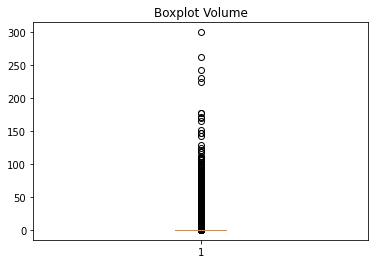

In [20]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot Volume')
ax1.boxplot(sales['Volumen'])
plt.show()

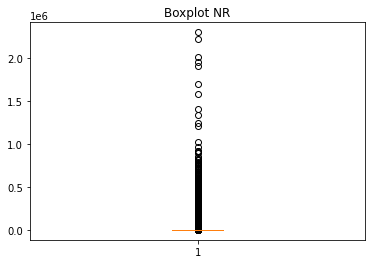

In [21]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot NR')
ax1.boxplot(sales['nr'])
plt.show()

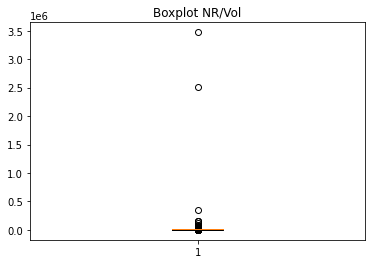

In [22]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot NR/Vol')
ax1.boxplot(sales['NR/Vol'])
plt.show()

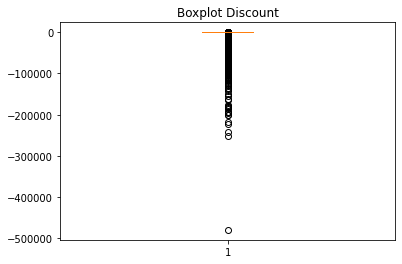

In [23]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot Discount')
ax1.boxplot(sales['disc'])
plt.show()

In [24]:
# Remove outliers

sales=sales[(sales['Volumen']<200) & (sales['NR/Vol']<2500000) & (sales['disc']>-450000)]

In [25]:
sales.shape

(1406108, 11)

## Sales history

In [26]:
month_sales=sales.groupby(['Año','Mes'],as_index=False)['Volumen','nr'].sum()
month_sales=month_sales.reset_index()

In [27]:
month_sales['NR/Vol']=month_sales['nr']/month_sales['Volumen']

In [28]:
month_sales

,index,Año,Mes,Volumen,nr,NR/Vol
0,0,2019,5,17792.191774,1.282201e+08,7206.540297
1,1,2019,6,19686.564201,1.425519e+08,7241.076245
2,2,2019,7,19593.604638,1.409720e+08,7194.797019
3,3,2019,8,21007.150226,1.521367e+08,7242.138146
4,4,2019,9,20226.404651,1.463797e+08,7237.059864
5,5,2019,10,20346.258446,1.500796e+08,7376.273451
6,6,2019,11,24266.702768,1.809040e+08,7454.824099
7,7,2019,12,28515.841201,2.222373e+08,7793.469608
8,8,2020,1,19345.840832,1.443545e+08,7461.785578
9,9,2020,2,16390.290080,1.237786e+08,7551.946692


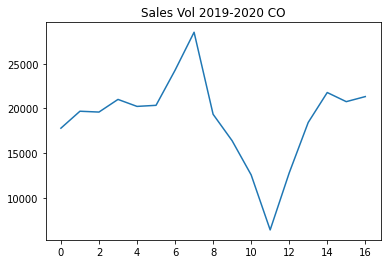

In [29]:
plt.plot(month_sales['index'],month_sales['Volumen'])
plt.title('Sales Vol 2019-2020 CO')
plt.show()

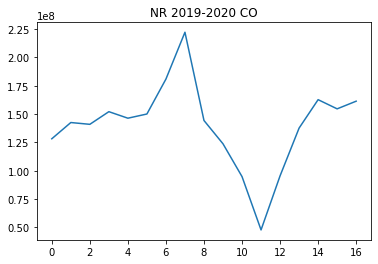

In [30]:
plt.plot(month_sales['index'],month_sales['nr'])
plt.title('NR 2019-2020 CO')
plt.show()

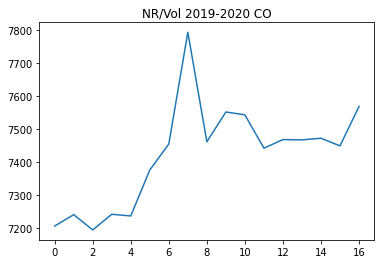

In [31]:
plt.plot(month_sales['index'],month_sales['NR/Vol'])
plt.title('NR/Vol 2019-2020 CO')
plt.show()

Sales decreased a lot due to the COVID aoutbreak. The prices have been increased since last year

## Other Info

In [32]:
len(sales.Cliente.unique())

17009

In [33]:
len(test.Cliente.unique())

9302

# 4) Data Preprocessing

In [34]:
products_to_score['Llave']=products_to_score.Marca2+products_to_score.Cupo2+products_to_score.CapacidadEnvase

In [35]:
products['Llave']=products.Marca2+products.Cupo2+products.CapacidadEnvase2

In [36]:
products_to_score=products_to_score.merge(products[['Llave','product_id']],how='left',on='Llave')
products_to_score=products_to_score.merge(products[['product_id','SegmentoPrecio2']],how='left',on='product_id')
products_to_score

,ID,Marca2,Cupo2,CapacidadEnvase,Llave,product_id,SegmentoPrecio2
0,1,Marca_20,Cupo_3,CapacidadEnvase_9,Marca_20Cupo_3CapacidadEnvase_9,42.0,SegmentoPrecio_1
1,2,Marca_16,Cupo_2,CapacidadEnvase_10,Marca_16Cupo_2CapacidadEnvase_10,26.0,SegmentoPrecio_2
2,3,Marca_9,Cupo_2,CapacidadEnvase_12,Marca_9Cupo_2CapacidadEnvase_12,NaN,NaN
3,4,Marca_38,Cupo_2,CapacidadEnvase_10,Marca_38Cupo_2CapacidadEnvase_10,69.0,SegmentoPrecio_1
4,5,Marca_39,Cupo_2,CapacidadEnvase_10,Marca_39Cupo_2CapacidadEnvase_10,70.0,SegmentoPrecio_3


In [37]:
test.head()

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,10C,NaN,NaN,NaN,NaN,NaN
1,12C,NaN,NaN,NaN,NaN,NaN
2,14C,NaN,NaN,NaN,NaN,NaN
3,15C,NaN,NaN,NaN,NaN,NaN
4,18C,NaN,NaN,NaN,NaN,NaN


In [38]:
test=test.drop(['Marca1','Marca2','Marca3','Marca_Inno1','Marca_Inno2'],axis=1)
test['Año']=2020
test['Mes']=10
test['Volumen']=0
test['nr']=0
test['NR/Vol']=0
test.head()

,Cliente,Año,Mes,Volumen,nr,NR/Vol
0,10C,2020,10,0,0,0
1,12C,2020,10,0,0,0
2,14C,2020,10,0,0,0
3,15C,2020,10,0,0,0
4,18C,2020,10,0,0,0


In [39]:
test1=test.copy()
test2=test.copy()
test3=test.copy()
test4=test.copy()
test5=test.copy()

In [40]:
test1['product_id']=42
test2['product_id']=26
test3['product_id']=102
test4['product_id']=69
test5['product_id']=70

In [41]:
test=test1.append([test2,test3,test4,test5])
test.shape

(46510, 7)

In [42]:
test=test.merge(products,how='left',on='product_id')
test.head()

,Cliente,Año,Mes,Volumen,nr,NR/Vol,product_id,Marca2,Cupo2,CapacidadEnvase2,SegmentoPrecio2,Llave
0,10C,2020,10,0,0,0,42,Marca_20,Cupo_3,CapacidadEnvase_9,SegmentoPrecio_1,Marca_20Cupo_3CapacidadEnvase_9
1,12C,2020,10,0,0,0,42,Marca_20,Cupo_3,CapacidadEnvase_9,SegmentoPrecio_1,Marca_20Cupo_3CapacidadEnvase_9
2,14C,2020,10,0,0,0,42,Marca_20,Cupo_3,CapacidadEnvase_9,SegmentoPrecio_1,Marca_20Cupo_3CapacidadEnvase_9
3,15C,2020,10,0,0,0,42,Marca_20,Cupo_3,CapacidadEnvase_9,SegmentoPrecio_1,Marca_20Cupo_3CapacidadEnvase_9
4,18C,2020,10,0,0,0,42,Marca_20,Cupo_3,CapacidadEnvase_9,SegmentoPrecio_1,Marca_20Cupo_3CapacidadEnvase_9


In [43]:
test=test.drop('Llave',axis=1)

In [44]:
sales.columns

Index(['Año', 'Mes', 'Cliente', 'SegmentoPrecio2', 'Marca2', 'Cupo2',
       'CapacidadEnvase2', 'Volumen', 'disc', 'nr', 'NR/Vol'],
      dtype='object')

In [45]:
sales['Llave']=sales.Marca2+sales.Cupo2+sales.CapacidadEnvase2
sales=sales.merge(products[['Llave','product_id']],how='left',on='Llave')
sales.head()

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,NR/Vol,Llave,product_id
0,2019,5,10C,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,8022.276248,Marca_1Cupo_1CapacidadEnvase_12,0
1,2019,5,10C,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,6863.977158,Marca_2Cupo_2CapacidadEnvase_10,39
2,2019,5,10C,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,8273.192177,Marca_3Cupo_2CapacidadEnvase_10,59
3,2019,5,10C,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,5114.813411,Marca_1Cupo_2CapacidadEnvase_16,4
4,2019,5,10C,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,5715.603808,Marca_4Cupo_2CapacidadEnvase_10,74


In [46]:
sales=sales.drop('Llave',axis=1)

In [47]:
df=sales.append(test,sort=False)

In [48]:
df.shape

(1452618, 12)

In [49]:
df.columns

Index(['Año', 'Mes', 'Cliente', 'SegmentoPrecio2', 'Marca2', 'Cupo2',
       'CapacidadEnvase2', 'Volumen', 'disc', 'nr', 'NR/Vol', 'product_id'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452618 entries, 0 to 46509
Data columns (total 12 columns):
Año                 1452618 non-null int64
Mes                 1452618 non-null int64
Cliente             1452618 non-null object
SegmentoPrecio2     1452618 non-null object
Marca2              1452618 non-null object
Cupo2               1452618 non-null object
CapacidadEnvase2    1452618 non-null object
Volumen             1452618 non-null float64
disc                1406108 non-null float64
nr                  1452618 non-null float64
NR/Vol              1452618 non-null float64
product_id          1452618 non-null int64
dtypes: float64(4), int64(3), object(5)
memory usage: 144.1+ MB


In [51]:
df=df.merge(customers,how='left',on='Cliente')
df.head()

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,NR/Vol,product_id,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
0,2019,5,10C,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,8022.276248,0,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1
1,2019,5,10C,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,6863.977158,39,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1
2,2019,5,10C,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,8273.192177,59,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1
3,2019,5,10C,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,5114.813411,4,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1
4,2019,5,10C,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,5715.603808,74,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1


In [52]:
month_sales['Llave']=month_sales['Año'].astype(str)+'-'+month_sales['Mes'].astype(str)
df['Llave']=df['Año'].astype(str)+'-'+df['Mes'].astype(str)
df=df.merge(month_sales[['Llave','index']],how='left',on='Llave')
df.head()

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,NR/Vol,product_id,Regional2,Gerencia2,SubCanal2,Categoria,Nevera,Llave,index
0,2019,5,10C,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,8022.276248,0,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,2019-5,0.0
1,2019,5,10C,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,6863.977158,39,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,2019-5,0.0
2,2019,5,10C,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,8273.192177,59,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,2019-5,0.0
3,2019,5,10C,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,5114.813411,4,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,2019-5,0.0
4,2019,5,10C,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,5715.603808,74,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,2019-5,0.0


In [53]:
df.columns

Index(['Año', 'Mes', 'Cliente', 'SegmentoPrecio2', 'Marca2', 'Cupo2',
       'CapacidadEnvase2', 'Volumen', 'disc', 'nr', 'NR/Vol', 'product_id',
       'Regional2', 'Gerencia2', 'SubCanal2', 'Categoria', 'Nevera', 'Llave',
       'index'],
      dtype='object')

In [54]:
df.columns=['Año', 'Mes', 'Cliente', 'SegmentoPrecio2', 'Marca2', 'Cupo2',
       'CapacidadEnvase2', 'Volumen', 'disc', 'nr', 'NR/Vol', 'product_id',
       'Regional2', 'Gerencia2', 'SubCanal2', 'Categoria', 'Nevera', 'Llave',
       'period']

In [55]:
df['period']=df['period'].fillna(17)

In [56]:
df=df.drop('Llave',axis=1)

In [57]:
# Master Groups

group_period_client=df.groupby(['period','Cliente'],as_index=False)['Volumen','nr','disc'].sum()
group_period_client['NR/Vol']=group_period_client['nr']/group_period_client['Volumen']

group_period_client_segment=df.groupby(['period','Cliente','SegmentoPrecio2'],as_index=False)['Volumen','nr','disc'].sum()
group_period_client_segment['NR/Vol']=group_period_client_segment['nr']/group_period_client_segment['Volumen']

group_period_client_brand=df.groupby(['period','Cliente','Marca2'],as_index=False)['Volumen','nr','disc'].sum()
group_period_client_brand['NR/Vol']=group_period_client_brand['nr']/group_period_client_brand['Volumen']

group_period_client_cupo=df.groupby(['period','Cliente','Cupo2'],as_index=False)['Volumen','nr','disc'].sum()
group_period_client_cupo['NR/Vol']=group_period_client_cupo['nr']/group_period_client_cupo['Volumen']

group_period_client_envase=df.groupby(['period','Cliente','CapacidadEnvase2'],as_index=False)['Volumen','nr','disc'].sum()
group_period_client_envase['NR/Vol']=group_period_client_envase['nr']/group_period_client_envase['Volumen']

In [58]:
# BigMatrix

result = []
for year in list(df['Año'].unique()):
    for month in list(df[df['Año']==year]['Mes'].unique()):
        if year==2020 and month==10:
            for customer in list(df[(df['Año']==2020)&(df['Mes']==10)]['Cliente'].unique()):
                result.append([year, month, customer])
        else:
            for customer in list(df['Cliente'].unique()):
                result.append([year, month, customer])

matrix = pd.DataFrame(result, columns = ['Año', 'Mes', 'Cliente'])

month_sales['Llave']=month_sales['Año'].astype(str)+'-'+month_sales['Mes'].astype(str)
matrix['Llave']=matrix['Año'].astype(str)+'-'+matrix['Mes'].astype(str)
matrix=matrix.merge(month_sales[['Llave','index']],how='left',on='Llave')
matrix=matrix.rename(columns={'index':'period'})
matrix['period']=matrix['period'].fillna(17)
matrix.tail()

,Año,Mes,Cliente,Llave,period
298450,2020,10,20186C,2020-10,17.0
298451,2020,10,20261C,2020-10,17.0
298452,2020,10,20309C,2020-10,17.0
298453,2020,10,20360C,2020-10,17.0
298454,2020,10,20569C,2020-10,17.0


In [59]:
matrix.shape

(298455, 5)

In [60]:
matrix=matrix.merge(customers,how='left',on='Cliente')
matrix.head()

,Año,Mes,Cliente,Llave,period,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
0,2019,5,10C,2019-5,0.0,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1
1,2019,5,12C,2019-5,0.0,Regional 1,Gerencia_3,Subcanal_4,Categoria_4,1
2,2019,5,14C,2019-5,0.0,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1
3,2019,5,15C,2019-5,0.0,Regional 1,Gerencia_2,Subcanal_3,Categoria_2,1
4,2019,5,18C,2019-5,0.0,Regional 1,Gerencia_3,Subcanal_1,Categoria_5,1


In [61]:
# Info total

matrix['Llave']=matrix['period'].astype(str)+'-'+matrix['Cliente'].astype(str)
group_period_client['Llave']=group_period_client['period'].astype(str)+'-'+group_period_client['Cliente'].astype(str)
matrix=matrix.merge(group_period_client[['Llave','Volumen','disc','nr','NR/Vol']],how='left',on='Llave')
matrix=matrix.rename(columns={'Volumen':'Volumen_total','disc':'disc_total','nr':'nr_total','NR/Vol':'NR/Vol_total'})
matrix=matrix.drop('Llave',axis=1)
matrix.head()

,Año,Mes,Cliente,period,Regional2,Gerencia2,SubCanal2,Categoria,Nevera,Volumen_total,disc_total,nr_total,NR/Vol_total
0,2019,5,10C,0.0,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,1.533922,-397.619203,11450.084419,7464.579938
1,2019,5,12C,0.0,Regional 1,Gerencia_3,Subcanal_4,Categoria_4,1,1.024152,-538.711628,8044.262478,7854.562732
2,2019,5,14C,0.0,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,1.331384,-961.927396,7837.207818,5886.512726
3,2019,5,15C,0.0,Regional 1,Gerencia_2,Subcanal_3,Categoria_2,1,1.215480,-534.213063,7401.532686,6089.389934
4,2019,5,18C,0.0,Regional 1,Gerencia_3,Subcanal_1,Categoria_5,1,1.198949,-721.993209,7610.347284,6347.516255


In [62]:
matrix.period.unique()

array([ 0.,  1.,  2.,  4.,  3.,  5.,  6.,  7.,  8.,  9., 10., 12., 13.,
       14., 15., 16., 11., 17.])

In [63]:
matrix['period']=matrix['period'].fillna(17)

In [64]:
def SetDataTargetProduct(matrix,product,to_score,df):
    
    result=to_score[to_score['product_id']==product]
    brand=result['Marca2']
    cupo=result['Cupo2']
    envase=result['CapacidadEnvase']
    segment=result['SegmentoPrecio2']
    
    
    matrix['Marca2']=brand
    matrix['Llave']=matrix['period'].astype(str)+'-'+matrix['Cliente'].astype(str)+'-'+matrix['Marca2']
    group_period_client_brand['Llave']=group_period_client_brand['period'].astype(str)+'-'+\
                                        group_period_client_brand['Cliente'].astype(str)+'-'+\
                                        group_period_client_brand['Marca2']
    matrix=matrix.merge(group_period_client_brand[['Llave','Volumen','disc','nr','NR/Vol']],how='left',on='Llave')
    matrix=matrix.rename(columns={'Volumen':'Volumen_brand','disc':'disc_brand','nr':'nr_brand','NR/Vol':'NR/Vol_brand'})
    matrix=matrix.drop(['Llave','Marca2'],axis=1)
    
    matrix['Cupo2']=cupo
    matrix['Llave']=matrix['period'].astype(str)+'-'+matrix['Cliente'].astype(str)+'-'+matrix['Cupo2']
    group_period_client_cupo['Llave']=group_period_client_cupo['period'].astype(str)+'-'+\
                                        group_period_client_cupo['Cliente'].astype(str)+'-'+\
                                        group_period_client_cupo['Cupo2']
    matrix=matrix.merge(group_period_client_cupo[['Llave','Volumen','disc','nr','NR/Vol']],how='left',on='Llave')
    matrix=matrix.rename(columns={'Volumen':'Volumen_cupo','disc':'disc_cupo','nr':'nr_cupo','NR/Vol':'NR/Vol_cupo'})
    matrix=matrix.drop(['Llave','Cupo2'],axis=1)
    
    matrix['CapacidadEnvase2']=envase
    matrix['Llave']=matrix['period'].astype(str)+'-'+matrix['Cliente'].astype(str)+'-'+matrix['CapacidadEnvase2']
    group_period_client_envase['Llave']=group_period_client_envase['period'].astype(str)+'-'+\
                                        group_period_client_envase['Cliente'].astype(str)+'-'+\
                                        group_period_client_envase['CapacidadEnvase2']
    matrix=matrix.merge(group_period_client_envase[['Llave','Volumen','disc','nr','NR/Vol']],how='left',on='Llave')
    matrix=matrix.rename(columns={'Volumen':'Volumen_envase','disc':'disc_envase','nr':'nr_envase','NR/Vol':'NR/Vol_envase'})
    matrix=matrix.drop(['Llave','CapacidadEnvase2'],axis=1)
    
    matrix['SegmentoPrecio2']=segment
    matrix['Llave']=matrix['period'].astype(str)+'-'+matrix['Cliente'].astype(str)+'-'+matrix['SegmentoPrecio2']
    group_period_client_segment['Llave']=group_period_client_segment['period'].astype(str)+'-'+\
                                        group_period_client_segment['Cliente'].astype(str)+'-'+\
                                        group_period_client_segment['SegmentoPrecio2']
    matrix=matrix.merge(group_period_client_segment[['Llave','Volumen','disc','nr','NR/Vol']],how='left',on='Llave')
    matrix=matrix.rename(columns={'Volumen':'Volumen_segment','disc':'disc_segment','nr':'nr_segment','NR/Vol':'NR/Vol_segment'})
    matrix=matrix.drop(['Llave','SegmentoPrecio2'],axis=1)
    
    matrix['product_id']=product
    matrix['Llave']=matrix['period'].astype(str)+'-'+matrix['Cliente'].astype(str)+'-'+matrix['product_id'].astype(str)
    df['Llave']=df['period'].astype(str)+'-'+df['Cliente'].astype(str)+'-'+df['product_id'].astype(str)
    matrix=matrix.merge(df[['Llave','Volumen','disc','nr','NR/Vol']],how='left',on='Llave')
    matrix=matrix.rename(columns={'Volumen':'Volumen_product','disc':'disc_product','nr':'nr_product','NR/Vol':'NR/Vol_product'})
    matrix=matrix.drop(['Llave','product_id'],axis=1)
    df=df.drop('Llave',axis=1)
    
    matrix=matrix.fillna(0)
    
    return matrix
    

In [65]:
def lag_features(df, lags, cols):
    col_df = df.columns
    for col in cols:
        lag_cols = [x for x in col_df if x.startswith(col)]
        for lag_col in lag_cols:
            tmp = df[['period','Cliente',lag_col]]
            for i in lags:
                shifted = tmp.copy()
                shifted.columns = ['period','Cliente', lag_col+'-'+str(i)]
                shifted['period'] += i
                df = pd.merge(df, shifted, on=['period','Cliente'], how='left')
                #print(df.shape)
    return df

In [66]:
def SetFinalDf(matrix,product,to_score,df,lags):
    cols = ['nr', 'disc', 'Volumen', 'NR/Vol']
    #cols_not = ['brand', 'cupo', 'envase', 'segment']
     
    data=SetDataTargetProduct(matrix,product,to_score,df)
    #features_to_drop = []
    #col_data = data.columns
    #for col in cols_not:
        #features_to_drop += ([x for x in col_data if x.endswith(col)])
    #data = data.drop(features_to_drop, axis=1)    
    data_lag=lag_features(data,lags,cols)
    data_lag['TARGET']=np.where(data_lag['Volumen_product']>0, 1, 0)
    #data_lag=data_lag.drop(['Volumen_product','disc_product','nr_product','NR/Vol_product'],axis=1)
    col_df = data_lag.columns
    drop_cols = []
    for col in cols:
        drop_cols += ([x for x in col_df if x.startswith(col) and x.find('-') == -1])
    data_lag=data_lag.drop(drop_cols,axis=1)
    #data_lag=data_lag.drop(['Volumen_product','disc_product','nr_product','NR/Vol_product', 'Volumen_total','disc_total','nr_total','NR/Vol_total'],axis=1)
    
    return data_lag

In [67]:
from sklearn.preprocessing import LabelEncoder

def TrainTestData(data):
    fields_to_encode=['Cliente','Regional2','Gerencia2','SubCanal2','Categoria']
    
    for i in range(0,len(fields_to_encode)):
        
        le=LabelEncoder()
        data[fields_to_encode[i]]=le.fit_transform(data[fields_to_encode[i]])
    
    data['Seasonality 1']=np.sin((2*np.pi*data['period'])/12)
    data['Seasonality 2']=np.cos((2*np.pi*data['period'])/12)
    
    X_train=data[(data['period']>1) & (data['period']<16)]
    y_train=X_train['TARGET']
    X_train=X_train.drop('TARGET',axis=1)
    
    X_val=data[data['period']==16]
    y_val=X_val['TARGET']
    X_val=X_val.drop('TARGET',axis=1)
    
    X_test=data[data['period']==17]
    y_test=X_test['TARGET']
    X_test=X_test.drop('TARGET',axis=1)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [68]:
#!pip install imblearn
#!pip install joblib
import xgboost as xgb
#import imblearn
import joblib

p=[42,26,102,69,70]
accuracies=[0,0,0,0,0]
results=[]
test_file=test=pd.read_csv('Input3_clientes_test.csv',sep=';')
test_file['Cliente']=test_file['Cliente'].astype(str)+"C"
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9302 entries, 0 to 9301
Data columns (total 6 columns):
Cliente        9302 non-null object
Marca1         0 non-null float64
Marca2         0 non-null float64
Marca3         0 non-null float64
Marca_Inno1    0 non-null float64
Marca_Inno2    0 non-null float64
dtypes: float64(5), object(1)
memory usage: 436.1+ KB


In [69]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298455 entries, 0 to 298454
Data columns (total 13 columns):
Año              298455 non-null int64
Mes              298455 non-null int64
Cliente          298455 non-null object
period           298455 non-null float64
Regional2        298455 non-null object
Gerencia2        298455 non-null object
SubCanal2        298455 non-null object
Categoria        298455 non-null object
Nevera           298455 non-null int64
Volumen_total    213936 non-null float64
disc_total       213936 non-null float64
nr_total         213936 non-null float64
NR/Vol_total     204634 non-null float64
dtypes: float64(5), int64(3), object(5)
memory usage: 31.9+ MB


In [71]:
predictions = pd.read_csv('Input3_clientes_test.csv',sep=';')
test_file=pd.read_csv('Input3_clientes_test.csv',sep=';')

for i in range(0,len(p)):
    
    data=SetFinalDf(matrix,p[i],products_to_score,df,[1,2])
    
    X_train, y_train, X_val, y_val, X_test, y_test = TrainTestData(data)
    
    #X = test_file.merge(X_test, how='left', on=['Cliente'])
    #X.drop(['Marca1', 'Marca2', 'Marca3', 'Marca_Inno2', 'Marca_Inno1'], axis=1, inplace=True)
    #X.fillna(0, inplace=True)
    #X = X[X_test.columns.to_list()]   

    #X_test['Cliente']=X_test['Cliente'].astype(str)
    
    #X_test=X_test.merge(test_file['Cliente'],how='inner',on='Cliente')
    #X_test['Cliente']=(X_test['Cliente'].str.slice(0,-1,1)).astype(int)
    #X_test=X_test.sort_values(by='Cliente')
    #X_test['Cliente']=X_test['Cliente'].astype(str)+"C"


    model = xgb.XGBClassifier(
        max_depth=7,
        n_estimators=1000,
        min_child_weight=0.5, 
        colsample_bytree=0.6, 
        subsample=0.6, 
        eta=0.1,
        scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1],
        seed=42)

    model.fit(
        X_train, 
        y_train,  
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=True,
        eval_metric='auc',
        early_stopping_rounds = 20)
    
    #evals_results=model.evals_result()
    #accuracies.append(evals_results['validation_1'])
    
    #pred=model.predict_proba(X_test)
    
    predictions.iloc[:,i+1] = model.predict_proba(X_test)[:,1]
    
    joblib.dump(model,'model'+str(p[i])+ '_lag2_paramchange'+ '.joblib')

[0]	validation_0-auc:0.97718	validation_1-auc:0.80619
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.97788	validation_1-auc:0.78058
[2]	validation_0-auc:0.97769	validation_1-auc:0.78058
[3]	validation_0-auc:0.97825	validation_1-auc:0.79530
[4]	validation_0-auc:0.97843	validation_1-auc:0.79724
[5]	validation_0-auc:0.97874	validation_1-auc:0.79780
[6]	validation_0-auc:0.97892	validation_1-auc:0.80129
[7]	validation_0-auc:0.97900	validation_1-auc:0.80142
[8]	validation_0-auc:0.97901	validation_1-auc:0.80142
[9]	validation_0-auc:0.97938	validation_1-auc:0.80337
[10]	validation_0-auc:0.97949	validation_1-auc:0.80337
[11]	validation_0-auc:0.97984	validation_1-auc:0.80532
[12]	validation_0-auc:0.98006	validation_1-auc:0.80476
[13]	validation_0-auc:0.98032	validation_1-auc:0.80573
[14]	validation_0-auc:0.98059	validation_1-auc:0.80675
[15]	validation_0-auc:0.9806

In [ ]:
predictions.to_csv('output.csv', index=False)